In [50]:
import sklearn.datasets
import pandas as pd

diabetes = sklearn.datasets.load_diabetes()

In [51]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [52]:
x = diabetes.data
y = diabetes.target

In [53]:
#Look at x: output one of records to see that it has the expected number of features
x.shape

(442, 10)

In [54]:
#Make a scatter plot using just one of the features in x vs the target variable y
age = x[:,0] #getting the first feature's arrays

<AxesSubplot:xlabel='Age', ylabel='Target'>

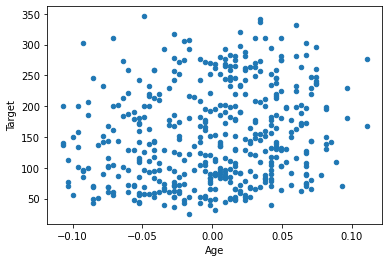

In [55]:
diabetesDict = {
    'Age' : age,
    'Target' : y
} #create dictionary with age and target data

df1 = pd.DataFrame(diabetesDict) #create data frame for scatter plot
df1.plot.scatter(x = 'Age', y = 'Target') #create scatter plot

<AxesSubplot:xlabel='Age', ylabel='Target'>

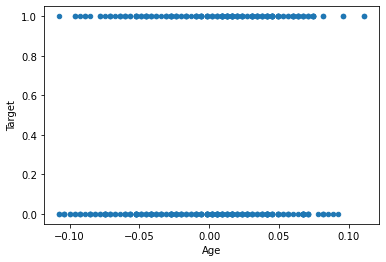

In [56]:
#Second scatter plot with True/False target category
y = (diabetes.target > 150).astype(int)

diabetesDict = {
    'Age' : age,
    'Target' : y
} 

df2 = pd.DataFrame(diabetesDict)
df2.plot.scatter(x = 'Age', y = 'Target')

In [57]:
#More plots with other features
#adding other features to dictionary
sex = x[:,1]
bmi = x[:,2]
tc = x[:,3]
ldl = x[:,4]
hdl = x[:,5]
tch = x[:,6]
ltg = x[:,7]
glu = x[:,8]

diabetesDict = {
    'Age' : age,
    'Sex' : sex,
    'BMI' : bmi,
    'TC' : tc,
    'LDL' : ldl,
    'HDL' : hdl,
    'TCH' : tch,
    'LTG' : ltg,
    'GLU' : glu,
    'Target' : y
} 

<AxesSubplot:xlabel='BMI', ylabel='Target'>

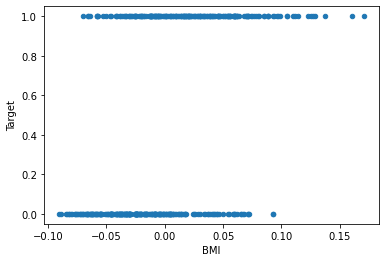

In [58]:
df3 = pd.DataFrame(diabetesDict)
df3.plot.scatter(x = 'BMI', y = 'Target')

<AxesSubplot:xlabel='TC', ylabel='Target'>

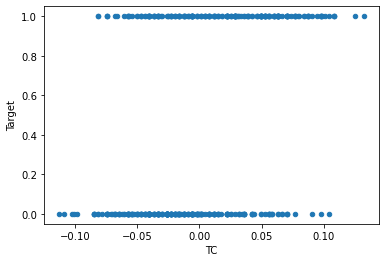

In [59]:
df3.plot.scatter(x = 'TC', y = 'Target')

<AxesSubplot:xlabel='LDL', ylabel='Target'>

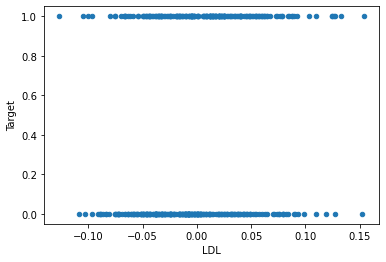

In [60]:
df3.plot.scatter(x = 'LDL', y = 'Target')

<AxesSubplot:xlabel='HDL', ylabel='Target'>

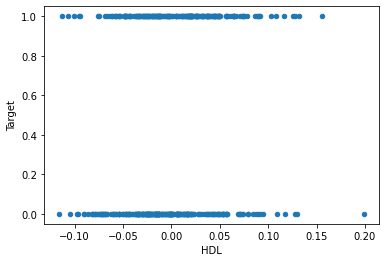

In [61]:
df3.plot.scatter(x = 'HDL', y = 'Target')

<AxesSubplot:xlabel='TCH', ylabel='Target'>

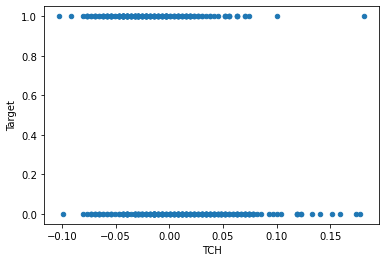

In [62]:
df3.plot.scatter(x = 'TCH', y = 'Target')

<AxesSubplot:xlabel='LTG', ylabel='Target'>

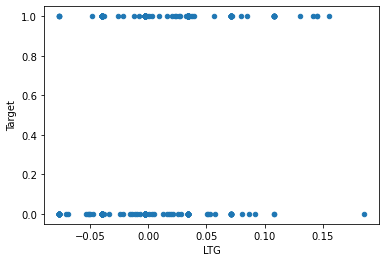

In [63]:
df3.plot.scatter(x = 'LTG', y = 'Target')

<AxesSubplot:xlabel='GLU', ylabel='Target'>

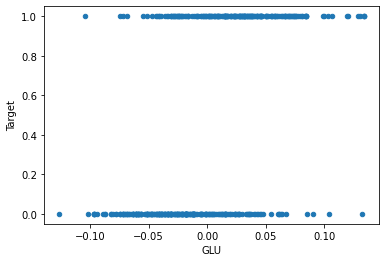

In [64]:
#GLU has GOOD RELATIONSHIP with y for classification
df3.plot.scatter(x = 'GLU', y = 'Target')

In [65]:
#Do classification with logistic regression
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.model_selection

#change data into a 2-D array format
x = df3[['GLU']]
y = df3['Target']

In [66]:
model = sklearn.linear_model.LogisticRegression() #Make model 

In [67]:
model.fit(x,y) #train model

LogisticRegression()

In [68]:
#Print the coefficients of the model

print(model.coef_)

[[4.15818976]]


In [69]:
#Generate a new array of x_new and y_new
x_new = np.linspace(-2,2,10000)
y_new = model.predict(x_test)

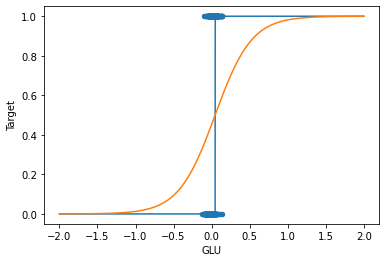

In [72]:
#Make line plot of y_vew vs x_new
df3.plot.scatter(x='GLU', y='Target',)
x_new = x_new.reshape(-1,1)

y_model = 1 / (1 + np.exp(-(model.intercept_ + model.coef_ * x_new)))

y_pred = model.predict(x_new)

plt.plot(x_new, y_pred)
plt.plot(x_new, y_model)


plt.show()

In [78]:
#Classification with k-nearest neigbors
import sklearn.neighbors

In [79]:
#change data into a 2-D array format
x = df3[['GLU']]
y = df3['Target']

In [80]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=100)

In [81]:
# Train the model
model.fit(x,y)

KNeighborsClassifier(n_neighbors=100)

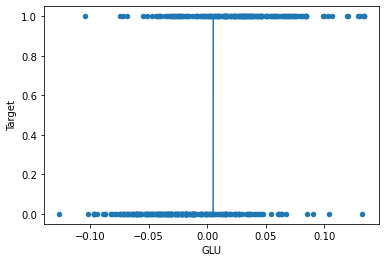

In [82]:
# Visualize what the predictions are for this model

df3.plot.scatter(x='GLU', y='Target')

x_new = np.linspace(-0.05,0.05,100000)
x_new = x_new.reshape(-1,1)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred)

plt.show()

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, model.predict(x))

array([[186,  56],
       [ 60, 140]])

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       242
           1       0.71      0.70      0.71       200

    accuracy                           0.74       442
   macro avg       0.74      0.73      0.73       442
weighted avg       0.74      0.74      0.74       442

